In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt

In [2]:
with open('scores/daily_scores_tcs.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%Y-%m-%d')
dfSentiment.head()

,jsonDate,sentiment,date
0,2023-04-01,"[0, 0, 0, 0, 1]",2023-04-01
1,2023-04-02,"[0, 0, 0, 0, 1]",2023-04-02
2,2023-04-03,"[0, 0, 0, 0, 1]",2023-04-03
3,2023-04-04,"[0.05867110192775726, 0.10393676161766052, 0.1...",2023-04-04
4,2023-04-05,"[0, 0, 0, 0, 1]",2023-04-05


In [3]:
csvFilePath = 'tcs_stock_price.csv'
dfCsv = pd.read_csv(csvFilePath)
dfCsv.head()

,Date,Open Price,High Price,Low Price,Close Price,No.of Shares
0,28-Mar-24,3856.45,3914.65,3840.50,3883.55,80498
1,27-Mar-24,3896.95,3896.95,3828.55,3837.50,71441
2,26-Mar-24,3897.55,3946.00,3872.00,3877.10,203863
3,22-Mar-24,3899.00,3938.40,3856.00,3913.10,275926
4,21-Mar-24,3985.40,4008.45,3948.85,3974.05,64927


In [4]:
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%d-%b-%y')
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])
dfMerged.head()

,Date,Open Price,High Price,Low Price,Close Price,No.of Shares,feature1,feature2,feature3,feature4,feature5
0,28-Mar-24,3856.45,3914.65,3840.50,3883.55,80498,0.000000,0.000000,0.000000,0.000000,1.000000
1,27-Mar-24,3896.95,3896.95,3828.55,3837.50,71441,0.487153,0.251424,0.163548,0.073486,0.024389
2,26-Mar-24,3897.55,3946.00,3872.00,3877.10,203863,0.368735,0.242812,0.150483,0.124607,0.113363
3,22-Mar-24,3899.00,3938.40,3856.00,3913.10,275926,0.000000,0.000000,0.000000,0.000000,1.000000
4,21-Mar-24,3985.40,4008.45,3948.85,3974.05,64927,0.360126,0.278943,0.163749,0.125021,0.072160


In [5]:
outputCsvPath = 'tcs_combined.csv'
dfMerged.to_csv(outputCsvPath, index=False)

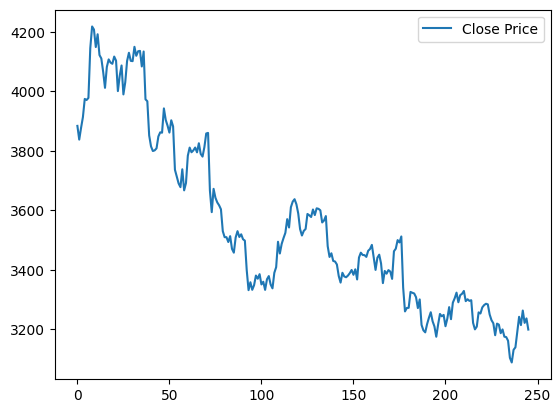

In [6]:
dfMerged[['Close Price']].plot()
plt.show()